<a href="https://colab.research.google.com/github/kacper-dobrow/tensorflow-course/blob/main/02_neural_net_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to nn classification with tf

Different types of classification
* Binary
* Multiclass
* Multilabel

## Creating data to view and fit

In [2]:
import tensorflow as tf
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


In [3]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualize the data

In [5]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


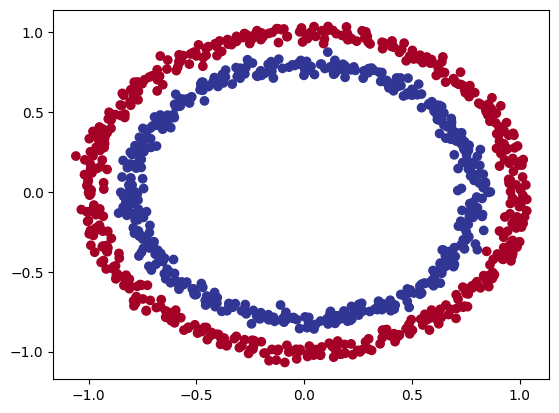

In [6]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.RdYlBu)

## Input and output shapes of our nn

In [7]:
# check the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# how many samples are there
len(X), len(y)

(1000, 1000)

In [9]:
# view the first example of features and labels
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


## Steps in modelling

In [10]:
# set seed for reproducibility
tf.random.set_seed(42)

# create a model
nn = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
nn.compile(optimizer = 'Adam',
           loss = tf.keras.losses.binary_crossentropy,
           metrics = 'accuracy') # accuracy - percentage of inputs our model got right

# fit the model
nn.fit(X,y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.3757 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0012 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.9052 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8610 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8273 - accuracy: 0.5000


In [11]:
# improve by training longer
nn.fit(X,y, epochs=200, verbose = 0)
nn.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 1.0000


[0.016271064057946205, 1.0]

In [15]:
# set seed for reproducibility
tf.random.set_seed(42)

# create a model
nn_2 = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
nn_2.compile(optimizer = 'Adam',
           loss = tf.keras.losses.binary_crossentropy,
           metrics = 'accuracy') # accuracy - percentage of inputs our model got right

# fit the model
nn_2.fit(X,y,epochs = 100, verbose = 0)
nn_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 1.0000


[0.021303148940205574, 1.0]

## Improving the model

1. Create a model - increase the number of layers/neurons, activation function
2. Compile the model - different optimizer and or learning rate
3. Fit the model - on more data/for longer


In [18]:
# set the random seed
tf.random.set_seed(42)

# Create the model
nn_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
nn_3.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.binary_crossentropy,
             metrics = 'accuracy')
# Fit
nn_3.fit(X,y,epochs = 100, verbose = 0)
nn_3.evaluate(X,y) # do NOT evaluate the model on the same data it was trained on

32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5060


[0.6954971551895142, 0.5059999823570251]

To visualize the predictions
Use the scn 'plot_decision_boundary()', which will
* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions and line between zones


In [23]:
import numpy as np

def plot_decision_boundary(model, X, y):
  '''
  Plots the decision boundary created by the model predictiong on X.
  '''
  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
# the meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  # create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)
  # check for multiclass
  if len(y_pred[0])>1:
    print('multiclass classification')
    # reshape the predictions
    y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha = 0.7)
  plt.scatter(X[:,0],X[:,1],c = y, s = 40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step
binary classification


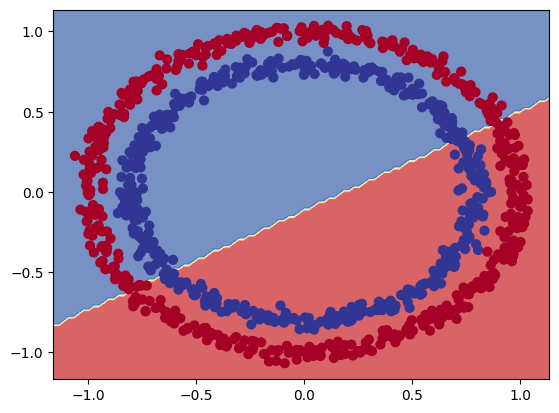

In [24]:
# check the predictions
plot_decision_boundary(nn_3,X,y)

https://cs231n.github.io/neural-networks-case-study/

https://madewithml.com/

In [ ]:
# let's see if it's good for regression